In [1]:
from random import sample

def ordered_crossover(chromo1, chromo2):
    """
    Perform ordered crossover on two parent chromosomes to produce offspring.

    Parameters
    ----------
    chromo1 : list
        The first parent chromosome.
    chromo2 : list
        The second parent chromosome.

    Returns
    -------
    ind1 : list
        The first offspring chromosome.
    ind2 : list
        The second offspring chromosome.

    Examples
    --------
    >>> random.seed(42)
    >>> chromo1 = [3, 5, 9, 2, 4]
    >>> chromo2 = [9, 2, 5, 4, 3]
    >>> ordered_crossover(chromo1, chromo2)
    ([3, 2, 5, 4, 9], [9, 5, 2, 4, 3])
    """
    size = min(len(chromo1), len(chromo2))
    a, b = sample(range(size), 2)
    if a > b:
        a, b = b, a

    ind1 = [None] * size
    ind2 = [None] * size

    # Copy the segment from a to b
    ind1[a:b+1] = chromo1[a:b+1]
    ind2[a:b+1] = chromo2[a:b+1]

    # Create the mapping of the remaining elements
    def fill_remaining(ind, chromo_source, start, end):
        current_index = (end + 1) % size
        for i in range(end + 1, end + size + 1):
            index = i % size
            if chromo_source[index] not in ind:
                ind[current_index] = chromo_source[index]
                current_index = (current_index + 1) % size

    fill_remaining(ind1, chromo2, a, b)
    fill_remaining(ind2, chromo1, a, b)

    return ind1, ind2

# Example usage
if __name__ == "__main__":
    import random
    random.seed(42)
    chromo1 = [3, 5, 9, 2, 4]
    chromo2 = [9, 2, 5, 4, 3]
    print(ordered_crossover(chromo1, chromo2))


([3, 5, 9, 2, 4], [9, 2, 5, 4, 3])


In [8]:
import csv
import random

# Generate a list of 60 customers
customers = [f"Customer {chr(65 + (i // 26)) + chr(65 + (i % 26))}" for i in range(61)]

# Generate random distances between customers
distances = []
for i in range(61):
    row = []
    for j in range(61):
        if i == j:
            row.append(0)
        else:
            row.append(random.randint(10, 100))
    distances.append(row)

# Writing data to CSV file
with open('JKMC.csv', mode='w', newline='') as file:
    writer = csv.writer(file)
    
    # Write header row
    writer.writerow([''] + customers)  # Empty cell for the first column header
    for i in range(len(customers)):
        row = [customers[i]] + distances[i]
        writer.writerow(row)

print("JKMC.csv has been generated successfully!")


JKMC.csv has been generated successfully!


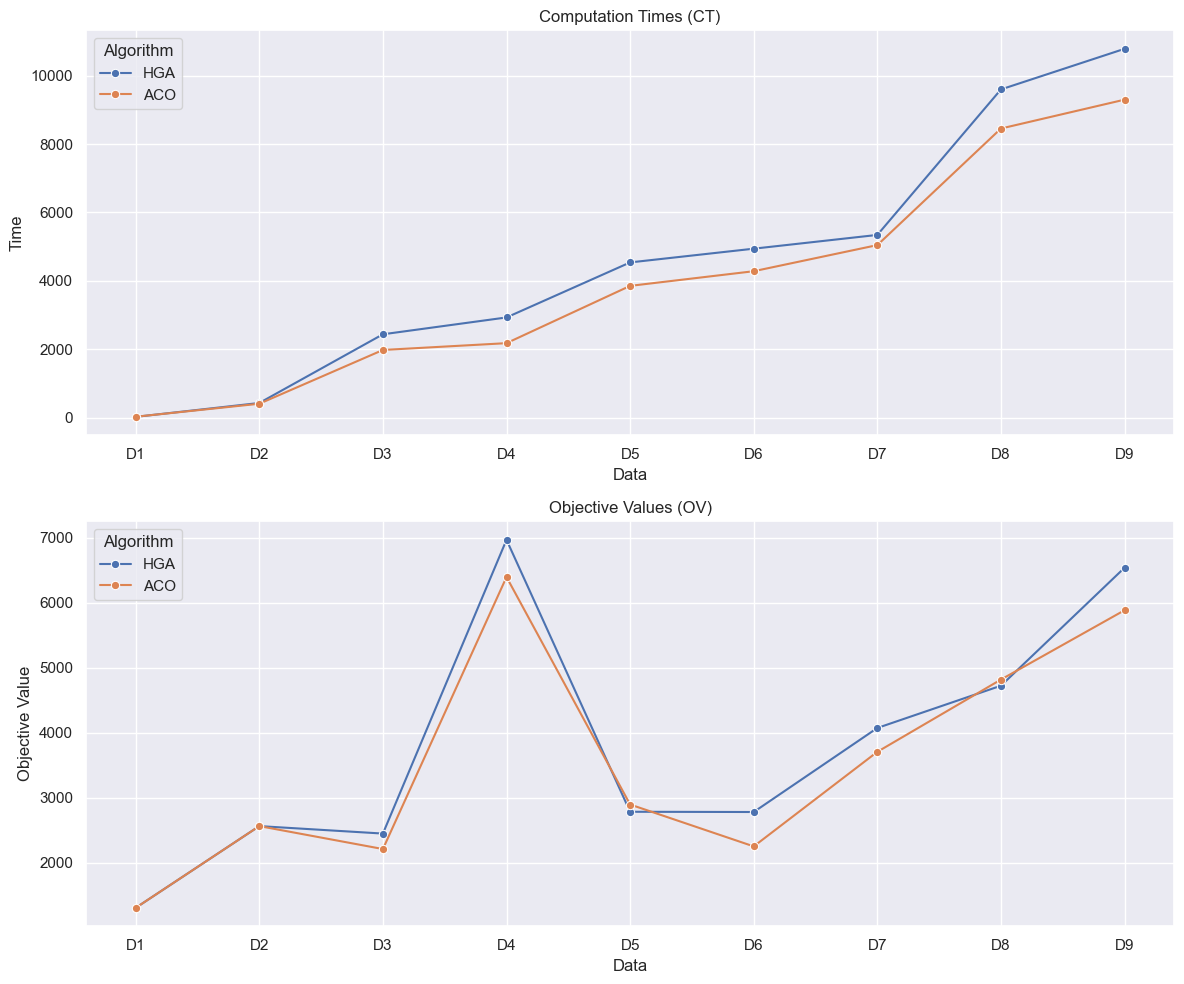

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data into a DataFrame
data = {
    'Data': ['D1', 'D2', 'D3', 'D4', 'D5', 'D6', 'D7', 'D8', 'D9'],
    'HGA_OV2': [1308.864, 2565.878, 2451, 6968.2, 2786.322, 2782.542, 4074.84, 4724.706, 6539.19],
    'HGA_CT2': [32, 437, 2443, 2935, 4542, 4943, 5345, 9594, 10780],
    'ACO_OV3': [1308.864, 2565.878, 2213.253, 6396.14, 2897.77488, 2253.85902, 3708.1044, 4819.20012, 5885.271],
    'ACO_CT3': [35, 415, 1985, 2184, 3857, 4285, 5048, 8452, 9295]
}

df = pd.DataFrame(data)

# Melt the DataFrame for easier plotting with Seaborn
df_melted = df.melt(id_vars='Data', var_name='Algorithm_Metric', value_name='Value')

# Split the Algorithm_Metric column into Algorithm and Metric
df_melted[['Algorithm', 'Metric']] = df_melted['Algorithm_Metric'].str.split('_', expand=True)

# Set the Seaborn style to darkgrid, which has a grey background
sns.set(style='darkgrid')

# Plot
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=False)

# Plot Computation Times
sns.lineplot(x='Data', y='Value', hue='Algorithm', data=df_melted[df_melted['Metric'].str.contains('CT')], ax=axes[0], marker='o')
axes[0].set_title('Computation Times (CT)')
axes[0].set_ylabel('Time')
axes[0].set_xlabel('Data')

# Plot Objective Values
sns.lineplot(x='Data', y='Value', hue='Algorithm', data=df_melted[df_melted['Metric'].str.contains('OV')], ax=axes[1], marker='o')
axes[1].set_title('Objective Values (OV)')
axes[1].set_ylabel('Objective Value')
axes[1].set_xlabel('Data')

plt.tight_layout()
plt.show()
